In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pico
import dft

Populating the interactive namespace from numpy and matplotlib


In [52]:
1/(1.25e6)

8e-07

In [53]:
.8e-6

8e-07

In [54]:
# make a large array of all of the data files so I can loop through them

vSig10 = np.load('lab1_10p_1.npy')
vSig20 = np.load('lab1_20p_1.npy')
vSig30 = np.load('lab1_30p_1.npy')
vSig40 = np.load('lab1_40p_1.npy')
vSig50 = np.load('lab1_50p_1.npy')
vSig60 = np.load('lab1_60p_1.npy')
vSig70 = np.load('lab1_70p_1.npy')
vSig80 = np.load('lab1_80p_1.npy')
vSig90 = np.load('lab1_90p_1.npy')

vSig = np.vstack([vSig10, vSig20, vSig30, vSig40, vSig50, vSig60, vSig70, vSig80, vSig90])/(2.**13)

In [55]:
vSamp = 12.5

In [56]:
def plotSignals(signal, vSamp, dataStreamBeg = 200, dataStreamEnd = 600):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output 
    ----
    plot of the signals
    """
    N = dataStreamEnd - dataStreamBeg
    
    time = np.linspace(-N/2/12.5, (N/2 - 1)/12.5, N)
    
    fig, ax = plt.subplots(9,1, figsize = (16,19))

    for i in range(len(signal)):
        ax[i].plot(time, signal[i][dataStreamBeg:dataStreamEnd], 'k.-')
        ax[i].set_title('{}0% of V_samp'.format(i+1))
        ax[i].set_ylim(-1,1)
        ax[i].set_ylabel('Voltage V')
        ax[i].set_xlabel('Time $\mu$s')
        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(36))
        ax[i].grid()  
    
#         if i != 8:
#             ax[i].set_xticklabels([])
    
    plt.tight_layout()
    


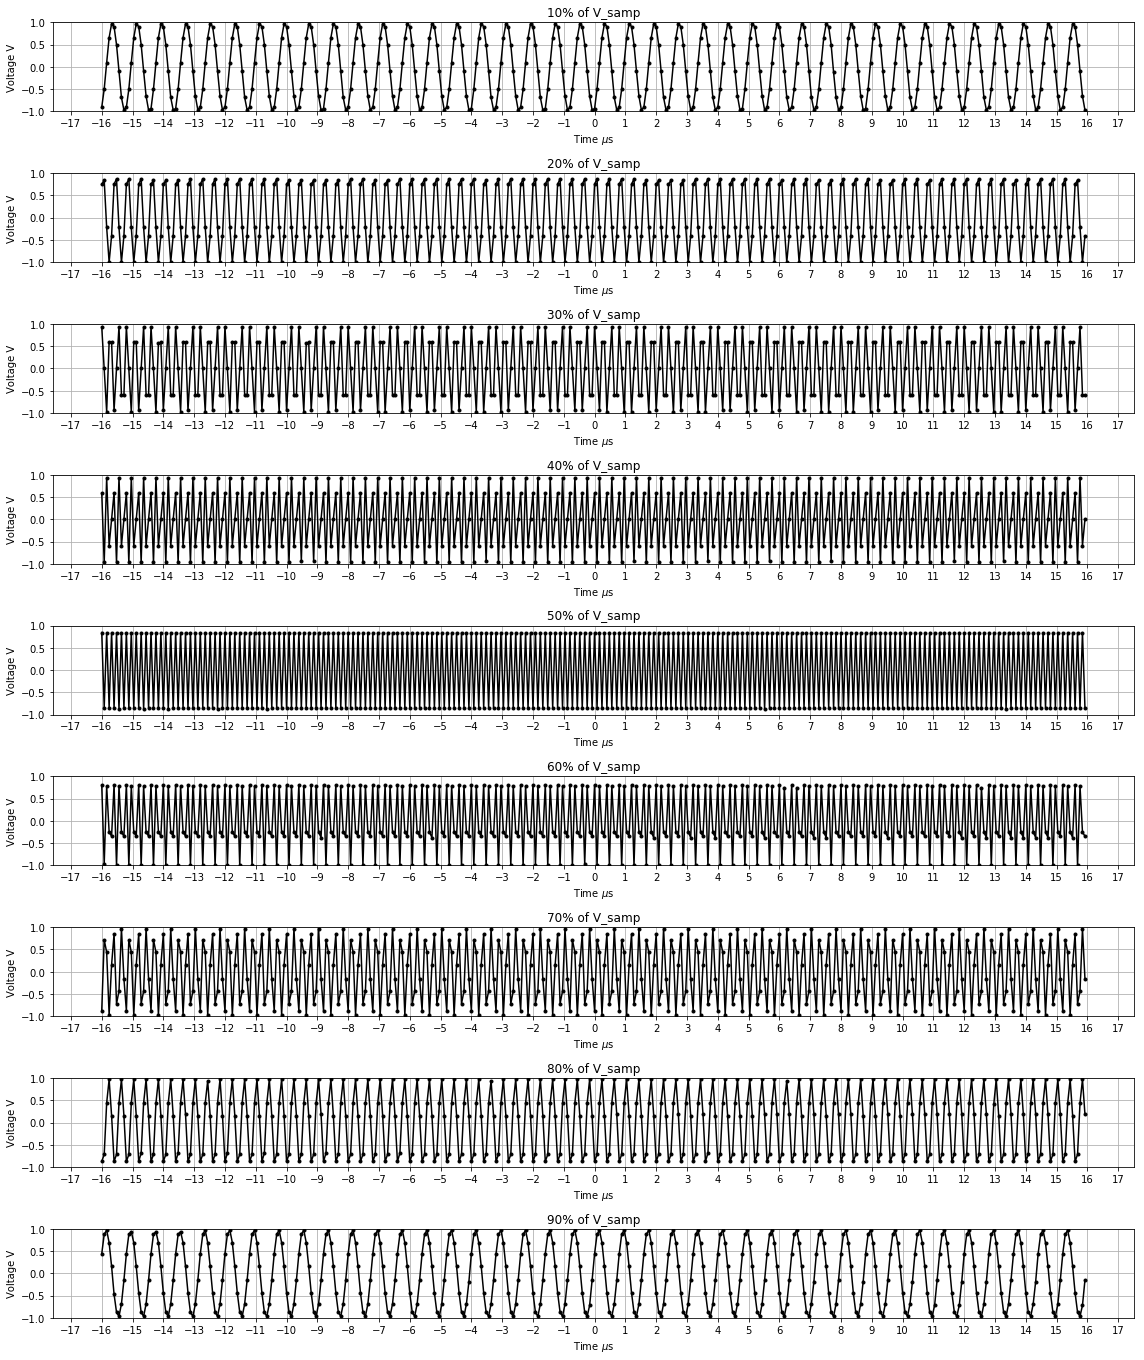

In [57]:
plotSignals(vSig, vSamp)

In [ ]:
def plotPowerSpectrum(signal, vSamp, dataStreamBeg = 200, dataStreamEnd = 400):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamBeg
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(len(signal),1, figsize = (20,16))
    
    maxInd = np.zeros(len(signal))

    for i in range(len(signal)):
        
        freq, vDFT = dft.dft(signal[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

        power = np.abs(vDFT)**2
        
        maxPower = max(power)
        maxPowerInd = np.argwhere(power == maxPower)
        maxInd[i] = maxPowerInd[0]
        
        ax[i].plot(freq, power, 'k.-', label = 'max at {}'.format(freq[int(maxInd[i])] ))
        ax[i].set_title('{}0%'.format(i+1))
        ax[i].legend()
        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
    
        if i != (len(signal)-1):
            ax[i].set_xticklabels([])
    plt.tight_layout()

In [ ]:
plotPowerSpectrum(vSig, vSamp, dataStreamBeg=2, dataStreamEnd=2**10)

    We see that the minimum sampling frequency we can get away with is half (6.25 MHz) of 12.5 MHz. After this we start to see aliasing. Where the sine wave appears to speed up again, but we know that the period should keep decreasing since the frequency is increasing. 

In [ ]:
def plotDFT(signal, vSamp, dataStreamBeg = 200, dataStreamEnd = 600):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamBeg
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(9,1, figsize = (20,16))

    for i in range(len(signal)):
        freq, vDFT = dft.dft(signal[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )
        
        ax[i].plot(freq, np.real(vDFT), 'k.-', label = 'real')
        ax[i].plot(freq, np.imag(vDFT), 'b.-', label = 'imaginary')
        ax[i].set_title('{}0%'.format(i+1))

        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
        ax[i].legend()
    
        if i != 8:
            ax[i].set_xticklabels([])
    plt.tight_layout()


In [ ]:
plotDFT(vSig, vSamp, dataStreamBeg=200, dataStreamEnd=300)

    The discrete fourier transform exhibits symmetry for negative and positive frequencies about 0. The real part is exactly symmetric whereas the imaginary part is anti symmetric. The left side is the conjugate of the right side. This makes sense when we think about what Fourier Transform really is; it decomposes our voltage as a function of time into the frequencies that make it up. The complex argument is the phase offset of the basic sinusoid in that frequency. This is why we see the imaginary argument as the conjugate of the other side; it has a phase offset. This all makes sense when we look at eulers equation
    
    $(\e^{i\theta} = \cos{\theta} + i\sin{\theta}\)$

### Repeat for several independent data streams. This kind of symmetry is called Hermitian symmetry

In [ ]:
plotDFT(vSig, vSamp, dataStreamBeg=100, dataStreamEnd=200)

In [ ]:
plotDFT(vSig, vSamp, dataStreamBeg=600, dataStreamEnd=700)

## What does it mean that the volatage spectra are complex? 
## 
## What do the real and imaginary parts represent? 
## 
## Is the imaginary part any less 'real' than the real part? 
## 
## Is it just a figment of your imagination? 
## 
## What does it mean that we talk of frequencies as being negative and positive?
## 
## Are negative frequencies any less real than positive ones? 
##

## When you compare the plots for several independent data strams, do the voltage spectra repeat identically? Why not?
## 
## What is happening when sometimes the real portions are positive or negative? 
## 
## When the imaginary portions have mroe amplitude than the real ones?

In [ ]:
plotDFT(vSig, vSamp, dataStreamBeg=100, dataStreamEnd=800)

In [ ]:
plotDFT(vSig, vSamp, dataStreamBeg=800, dataStreamEnd=1500)

### Repeat symmetry examination for power spectra and test repeatability

In [ ]:
plotPowerSpectrum(vSig, vSamp, dataStreamBeg=2*5, dataStreamEnd=2**10)

In [ ]:
plotPowerSpectrum(vSig, vSamp, dataStreamBeg=2*6, dataStreamEnd=2**11)

In [ ]:
def PowerSpectrumACF(signal, vSamp, dataStreamBeg = 200, dataStreamEnd = 400):
    signal = signal/(2**15)
    N = dataStreamEnd - dataStreamBeg
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
#     fig, ax = plt.subplots(9,1, figsize = (20,16))
    
    maxInd = np.zeros(9)

    for i in range(len(signal)):
        
        freq, vDFT = dft.dft(signal[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

        power = np.abs(vDFT)**2
        
        freqP, pIDFT = dft.idft(power, nu, time, vsamp = vSamp)
        
        ACF = np.correlate(signal[i], signal[i], 'same')
        print(len(pIDFT))
        print(len(ACF))

### choose one of the power spectra and take its inverse cosine fourier transform. Calculate the autocorrelation function (ACF) of its voltage time series. According to the correlation theorem, the FT of the power spectrum should equal the ACF. Does it? 
##

In [ ]:
len(np.correlate(vSig10/(2.**1), vSig10/(2.**13), 'full'))

In [ ]:
len(np.correlate(vSig10/(2.**13), vSig10/(2.**13), 'same'))

In [ ]:
fulllen(np.correlate(vSig10/(2.**13), vSig10/(2.**13), ''))

In [ ]:
PowerSpectrumACF(vSig, vSamp)

## 3.4 Spectral Leakage

In [ ]:
signal = vSig
dataStreamBeg = (2**15)/2
dataStreamEnd = 2**15

N = dataStreamEnd - dataStreamBeg
    
time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)

fig, ax = plt.subplots(1,1, figsize = (15,5))

maxInd = 0

freq, vDFT = dft.dft(vSig20[dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

power = np.abs(vDFT)**2

maxPower = max(power)
maxPowerInd = np.argwhere(power == maxPower)
maxInd = maxPowerInd[1]
print(maxInd)

ax.semilogy(freq, power, 'k.-', label = 'max at {}'.format(freq[int(maxInd)] ))
ax.set_title('20%')
ax.legend()

ax.yaxis.set_major_locator(plt.MaxNLocator(2))
ax.xaxis.set_major_locator(plt.MaxNLocator(18))
ax.grid()  

plt.tight_layout()

    I made the y axis log so that I can see clearly if there is leakage, and clearly there are more points where the power is nonzero

### can you understand what is going on form a mathematical viewpoint?
##

## 3.5

## 3.6 Nyquist Windows

### What do we get when we increase the frequencies range $\pm \nu_{samp}/2$. Explore Nyquist-sampled series and calculate Fourier Spectrum for much larger frequency range $\pm N\nu_{samp}/2$ where N is at least 4.

Explore different windows (i.e different values of N)

In [47]:
def plotNDFT(signal, vSamp, n, dataStreamEnd = 2**10):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamEnd/2
    dataStreamBeg = dataStreamEnd/2
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-n*vSamp/2., (n*vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(9,1, figsize = (20,16))

    for i in range(len(signal)):
        freq, vDFT = dft.dft(vSig[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )
        
        ax[i].plot(freq, np.real(vDFT), 'k.-', label = 'real')
        ax[i].plot(freq, np.imag(vDFT), 'b.-', label = 'imaginary')
        ax[i].set_title('{}0%'.format(i+1))

        
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].xaxis.set_major_locator(plt.MaxNLocator(18))
        ax[i].grid()  
        ax[i].legend()
    
        if i != 8:
            ax[i].set_xticklabels([])
    plt.tight_layout()
    print('We are looking at window {}'.format(n))

We are looking at window 4


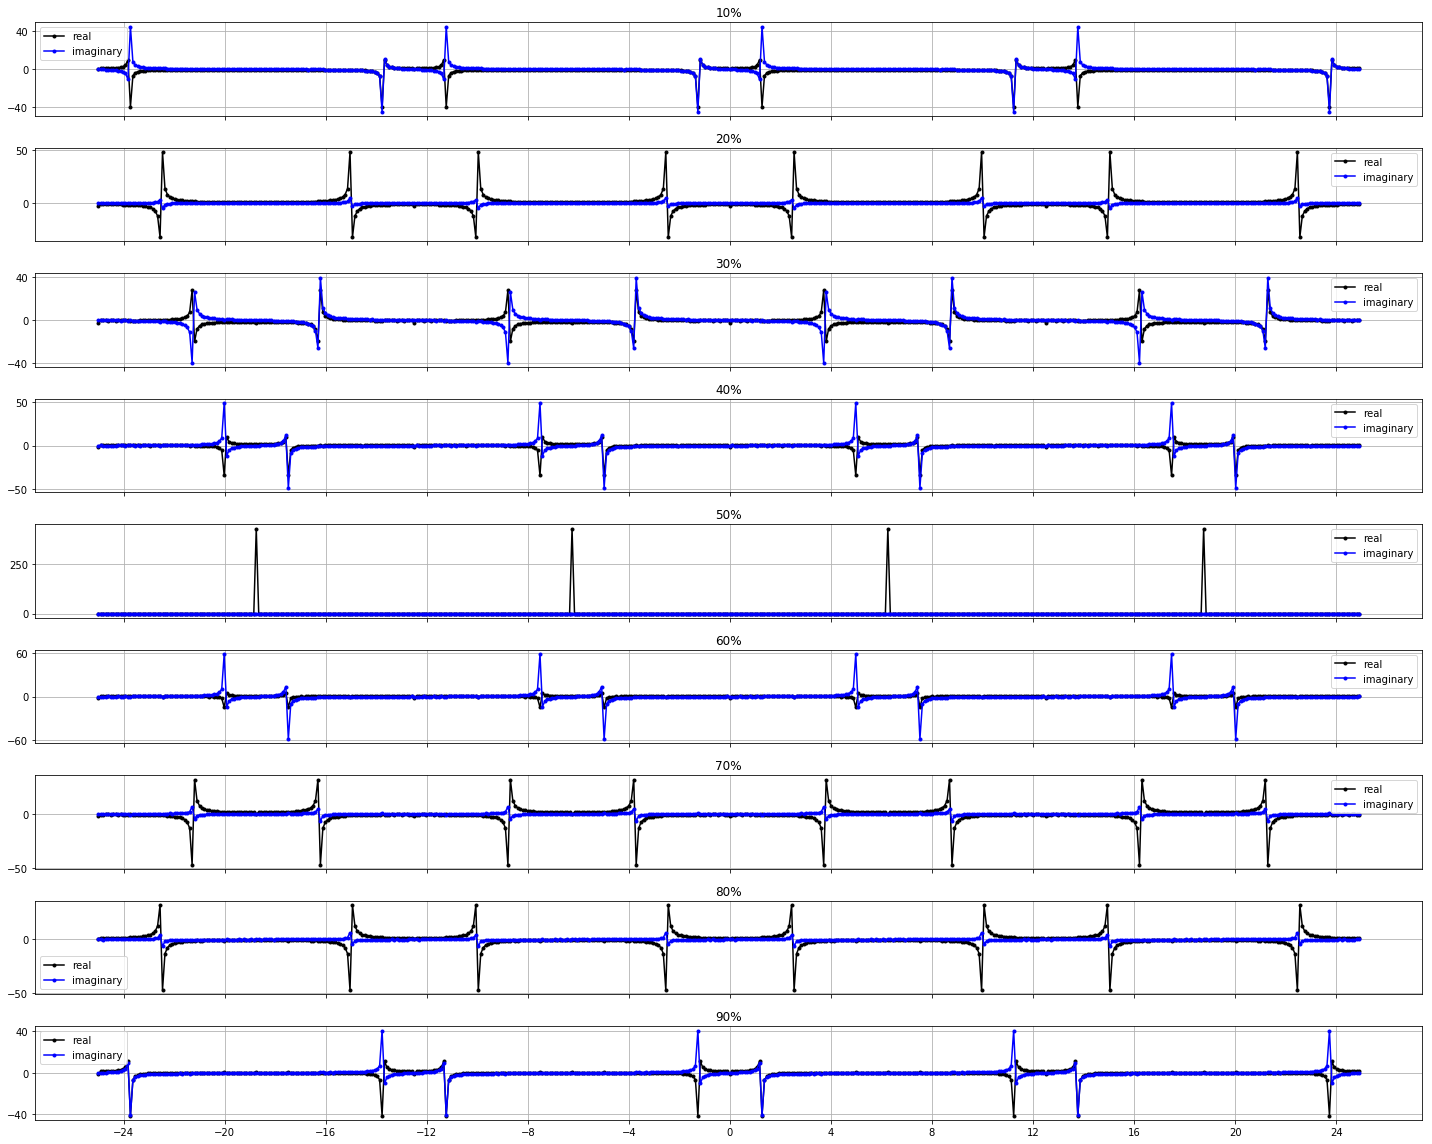

In [50]:
plotNDFT(vSig, vSamp, 4)

We are looking at window 5


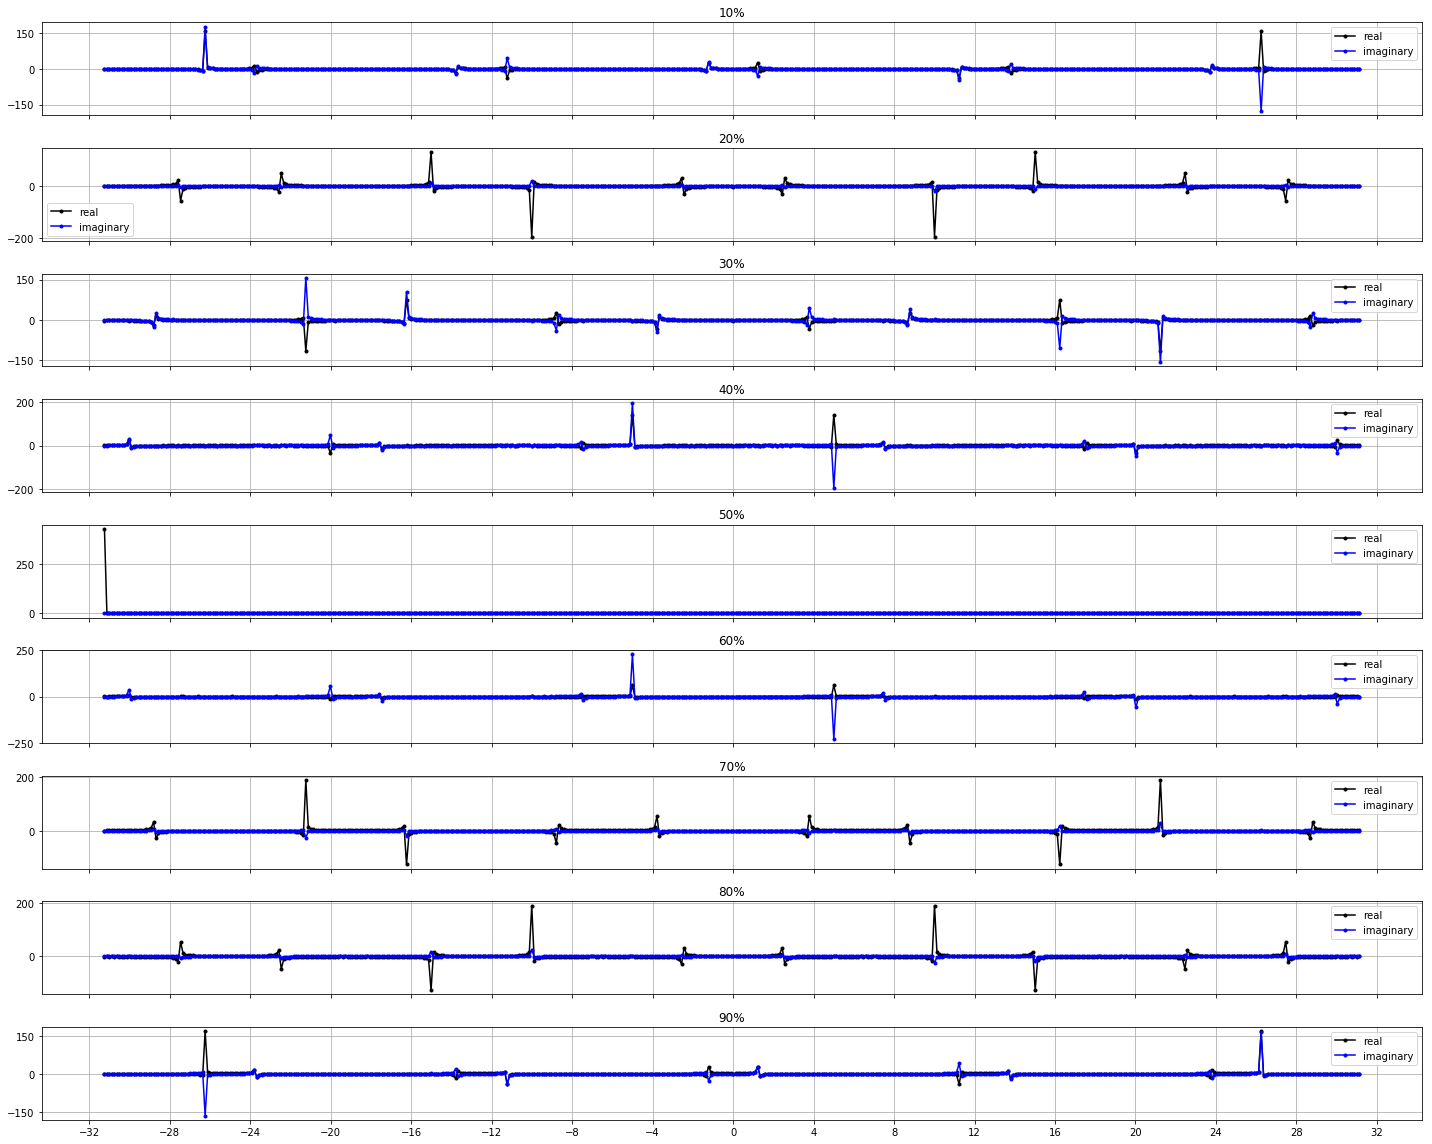

In [154]:
plotNDFT(vSig, vSamp, 5)

We are looking at window 6


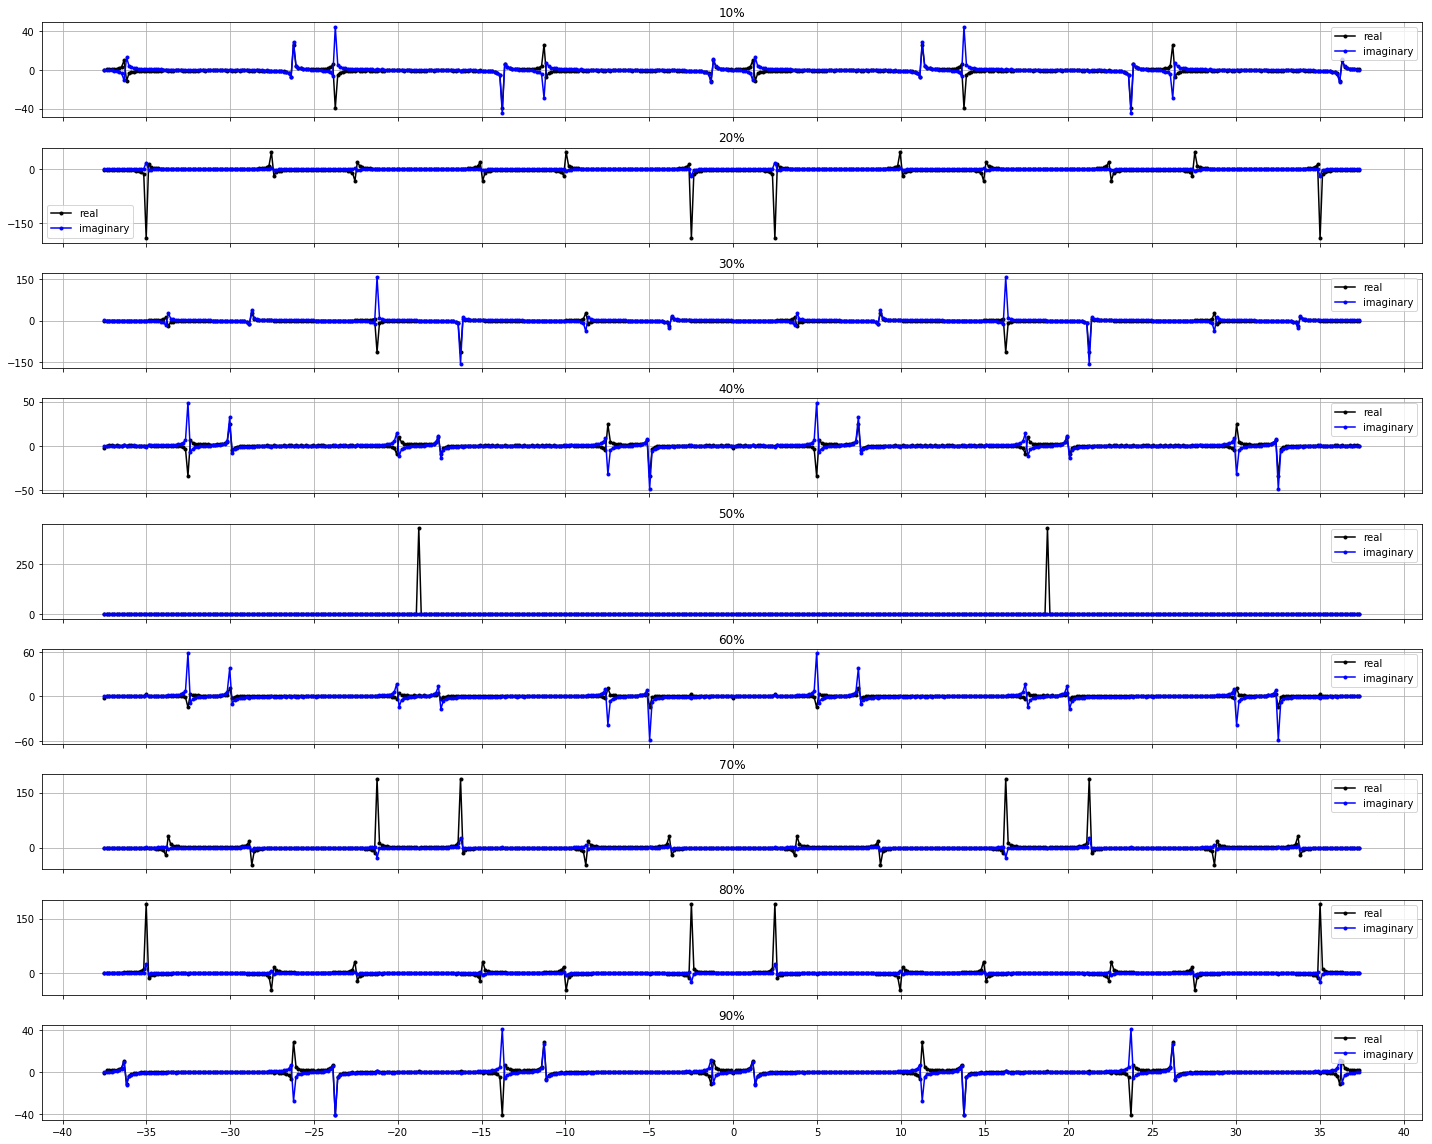

In [51]:
plotNDFT(vSig, vSamp, 6)

We are looking at window 7


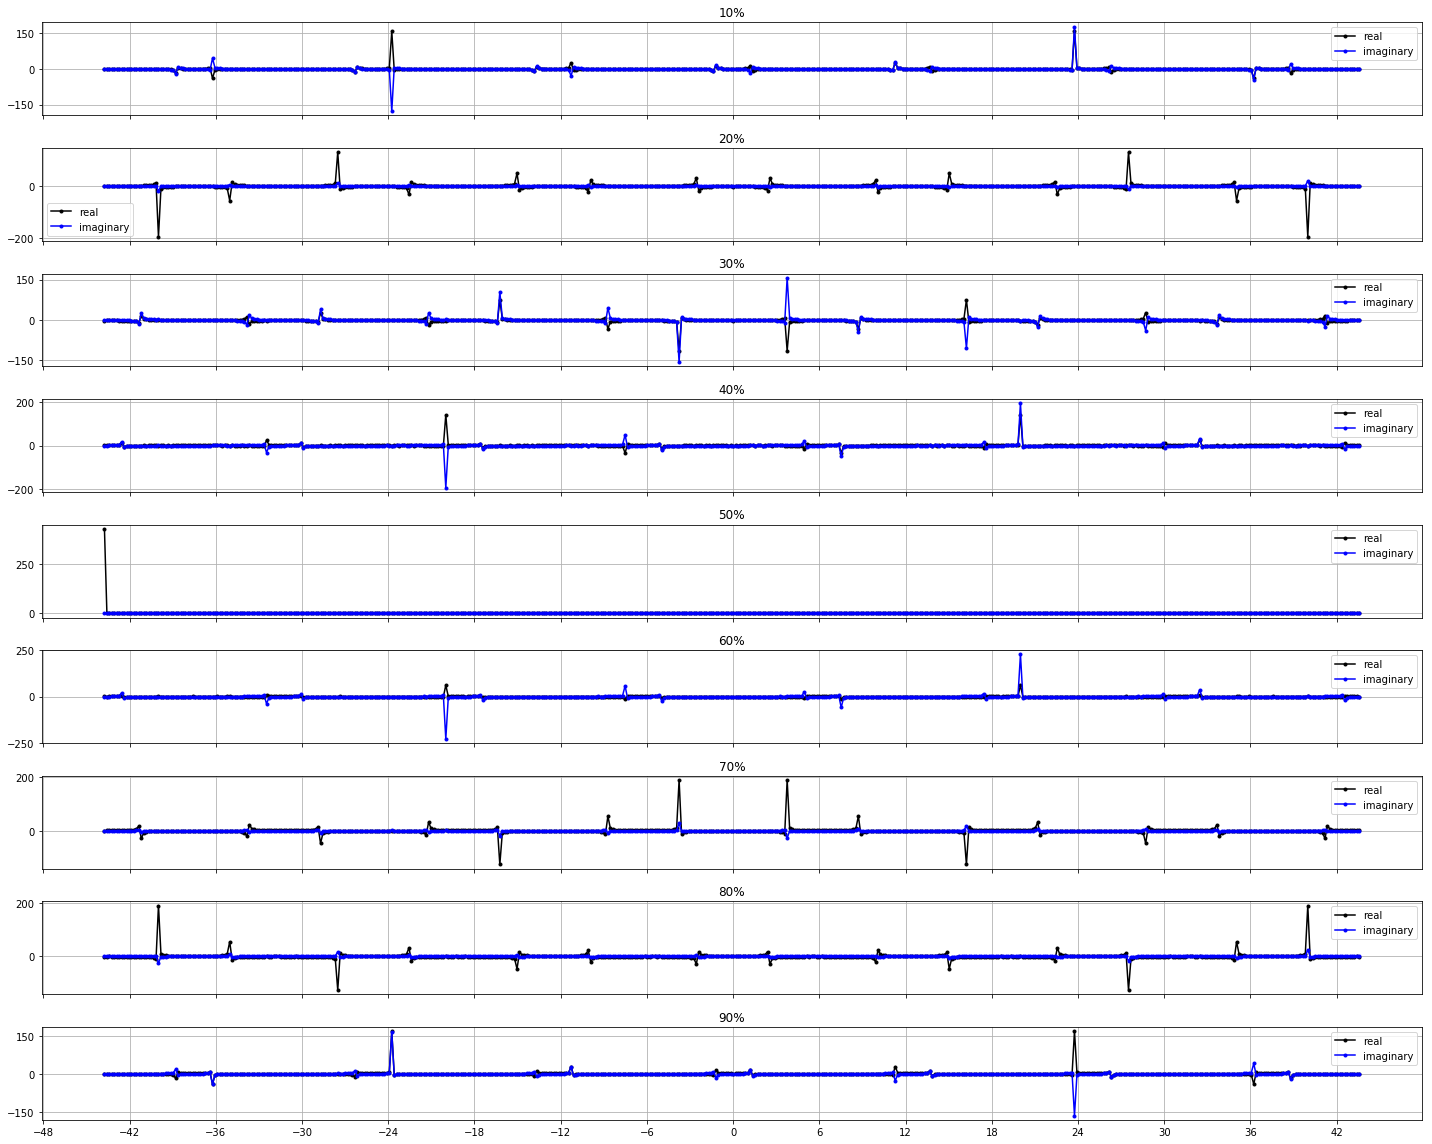

In [155]:
plotNDFT(vSig, vSamp, 7)

We are looking at window 8


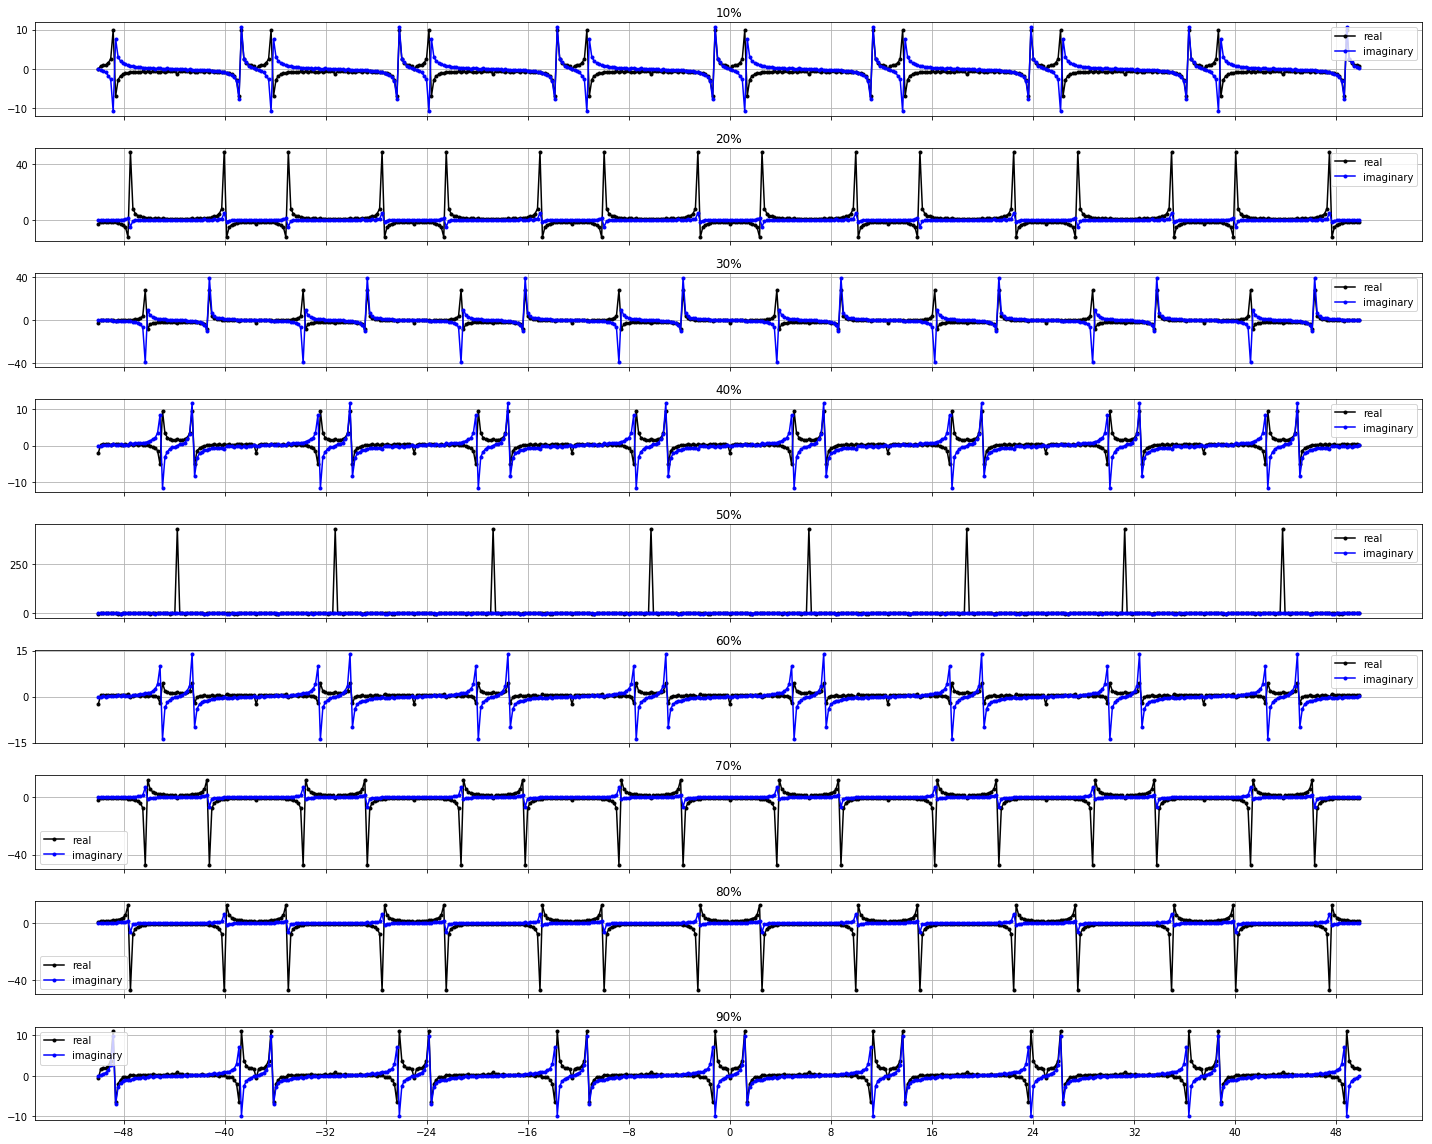

In [156]:
plotNDFT(vSig, vSamp, 8)

We are looking at window 9


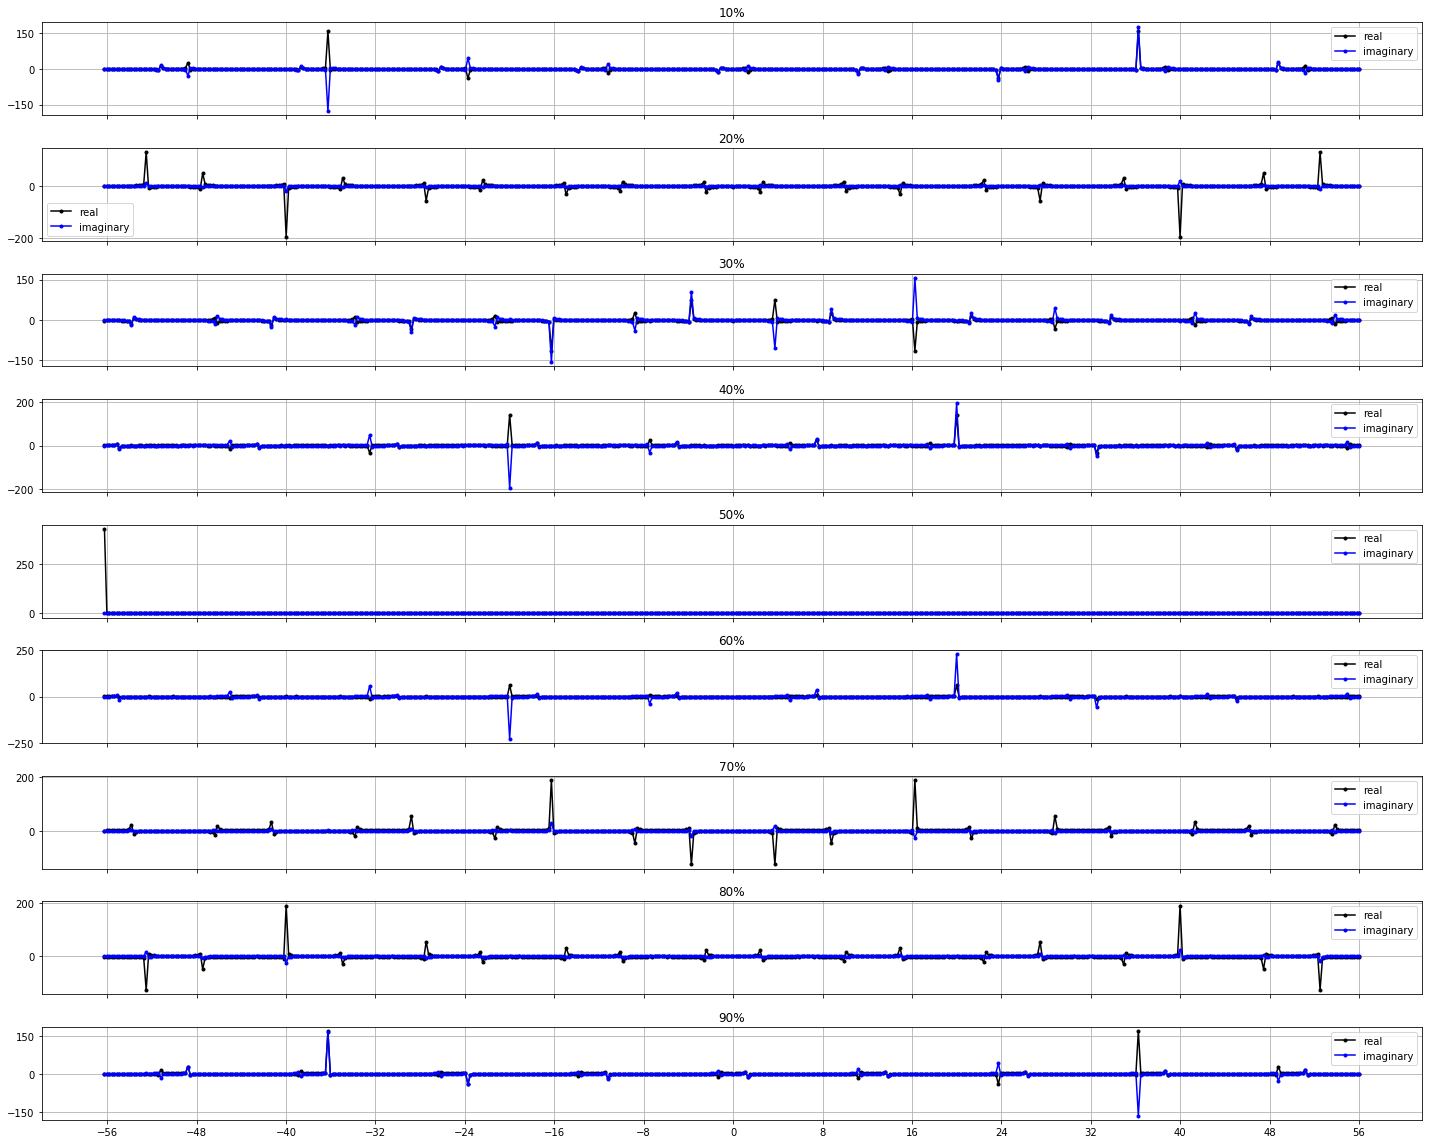

In [157]:
plotNDFT(vSig, vSamp, 9)

We are looking at window 10


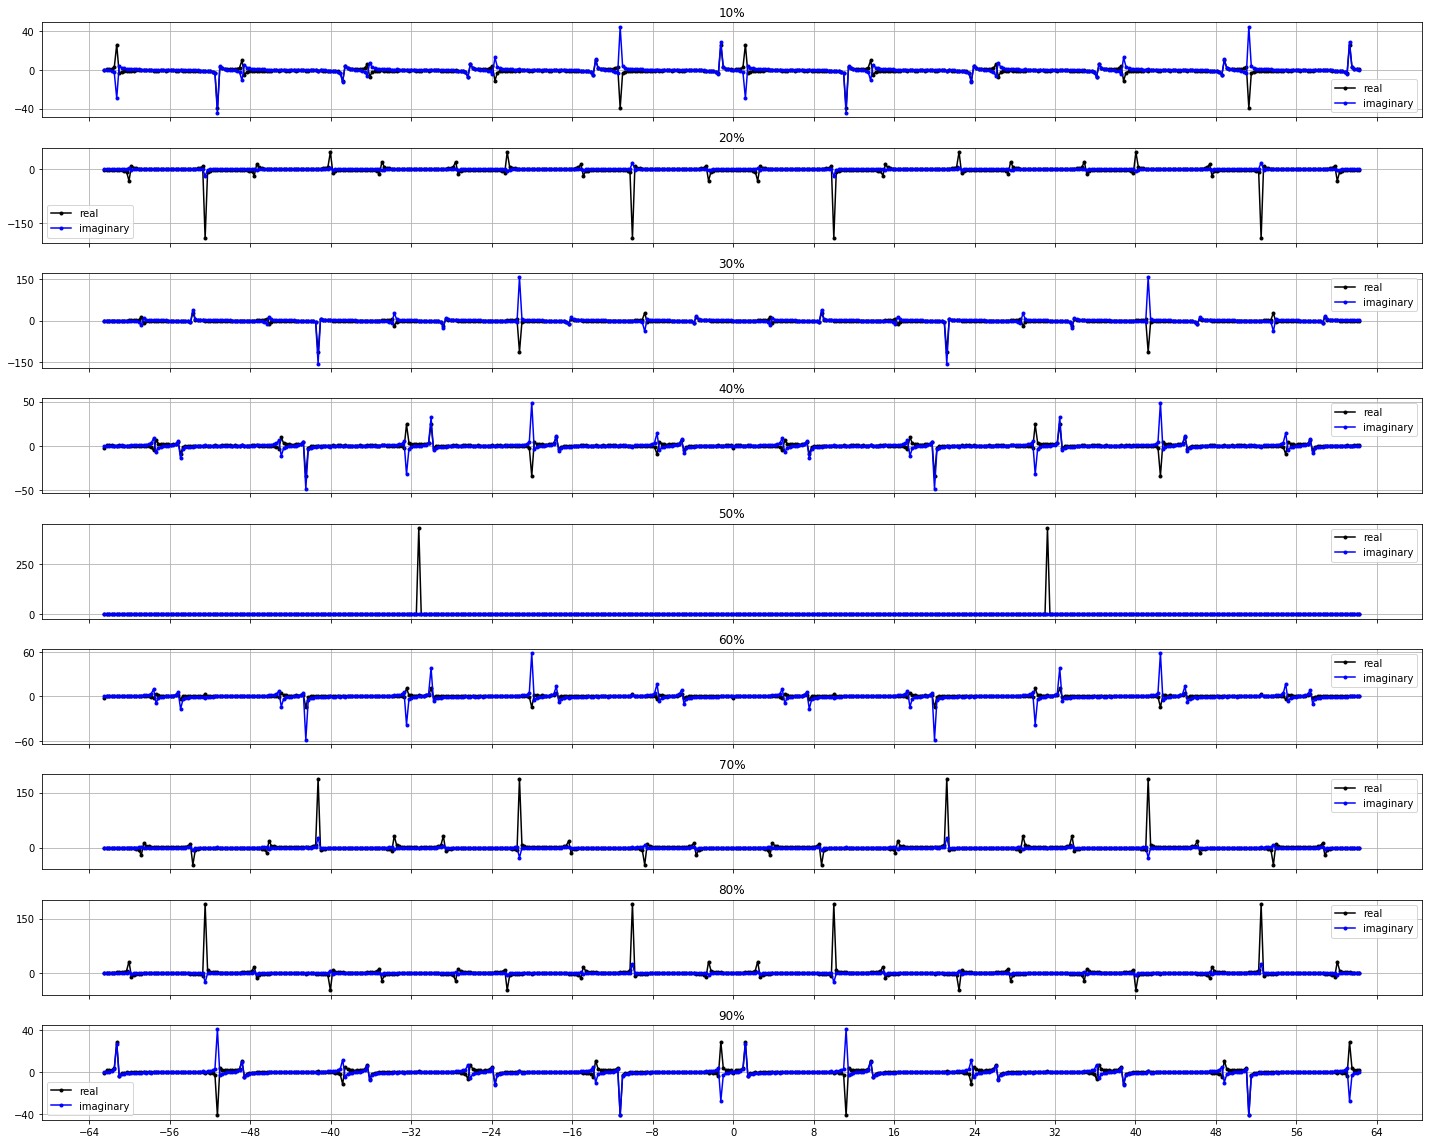

In [158]:
plotNDFT(vSig, vSamp, 10)

## 3.7 FTs of Noise

In [58]:
data32 = (np.load('data32_real.npz'))

In [59]:
arr16000

NameError: name 'arr16000' is not defined

In [61]:
arr16000 = (data32['arr_0'])
arr16000 = arr16000.astype(float)
arr32_16000 = (data32['arr_1'])
arr32_16000 = arr32_16000.astype(float)

### 1
    What is the mean voltage, mean square voltage, root-mean-square voltage?

In [62]:
# mean voltage
mean = np.mean(arr16000)
meanSq = np.mean(arr16000**2)
rms = np.sqrt(meanSq)

print ('The mean of the 16000-point time series (voltages) is {}'.format(mean))
print ('The mean square of the 16000-point time series (voltages) is {}'.format(meanSq))
print ('The root mean square of the 16000-point time series (voltages) is {}'.format(rms))

The mean of the 16000-point time series (voltages) is 305.152
The mean square of the 16000-point time series (voltages) is 6736576.512
The root mean square of the 16000-point time series (voltages) is 2595.49157425


### 2 
    Plot histogram of sampled voltages. Find width (is it equal o rms?). Overplot theoretically-expected Gaussian over data

In [63]:
# Define Gaussian distribution
def gaussian(x, mu, sigma):
    const = 1./np.sqrt(2.*np.pi*sigma**2)
    exp = np.exp(-((x - mu)**2)/(2.*sigma**2))
    return const*exp

# def gaussian(x, mu, sig):
#     return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

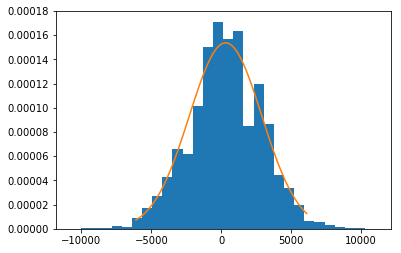

In [64]:
xval = np.linspace(-20.*mean, 20.*mean, 100)
gauss = gaussian(xval, mean, rms)

n, bins, edges = plt.hist(arr16000, bins = 30, normed = True)
plt.plot(xval, gauss)
plt.show()

### 3
    Now using the 32, 16000 array derive the power spectrum for each block using the direct FT method. Plot the average of all 32 power spectra. 

In [65]:
np.shape(arr32_16000)

(32, 16000)

In [147]:
def plotPowerSpectrum(signal, vSamp, dataStreamEnd = 2**12):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamEnd/2
    dataStreamBeg = dataStreamEnd/2
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(1,1,figsize = (15,6))
    
    maxInd = np.zeros(1)

    freq, vDFT = dft.dft(signal[dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

    power = np.abs(vDFT)**2

    ax.plot(freq, power, 'k.-')
    ax.set_title('Power Spectra')
#     ax.legend()

    ax.yaxis.set_major_locator(plt.MaxNLocator(2))
    ax.xaxis.set_major_locator(plt.MaxNLocator(18))
    ax.set_xlabel('frequency MHz')
    ax.set_ylabel('Voltage*time^2')
    ax.grid()  
    print("We are sampling with {} points".format(N))

    plt.tight_layout()

We are sampling with 1024 points
We are sampling with 1024 points
We are sampling with 1024 points
We are sampling with 1024 points
We are sampling with 1024 points


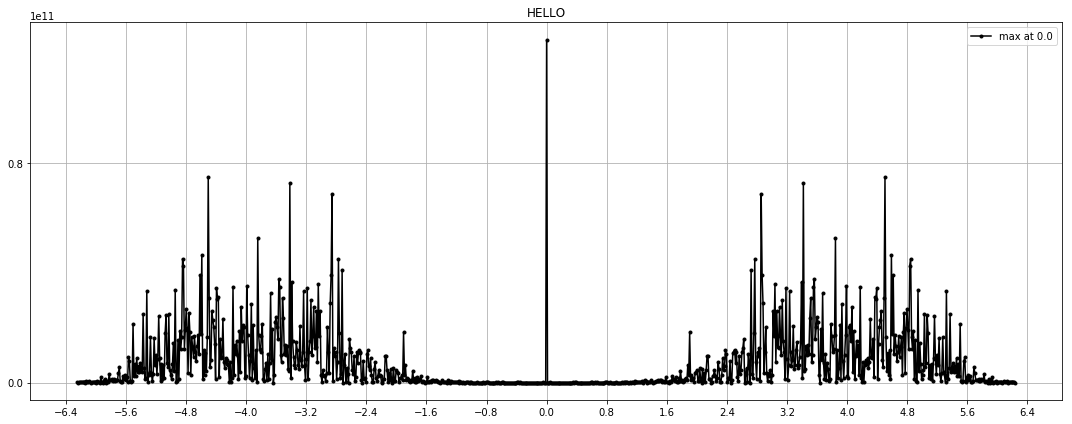

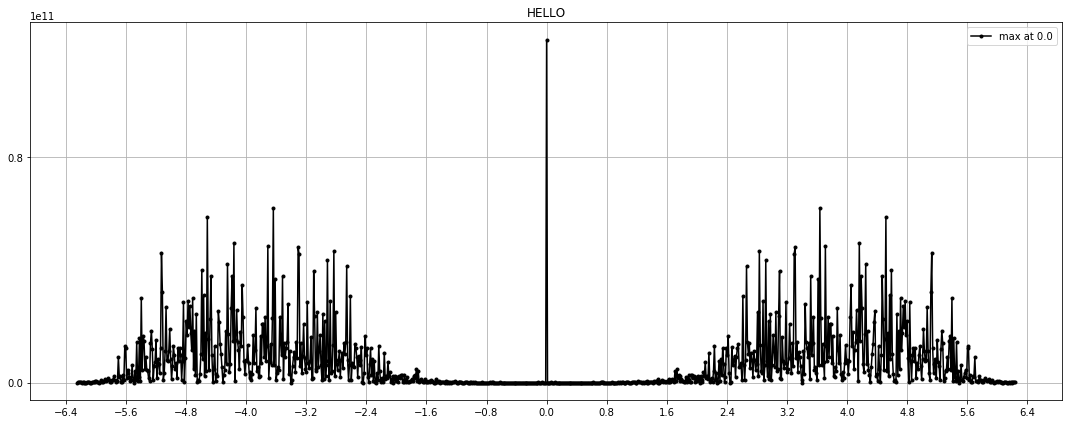

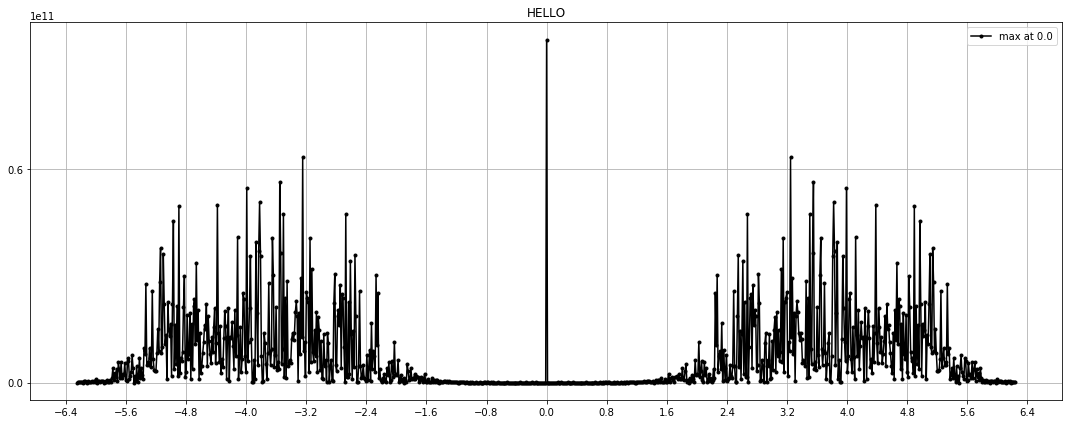

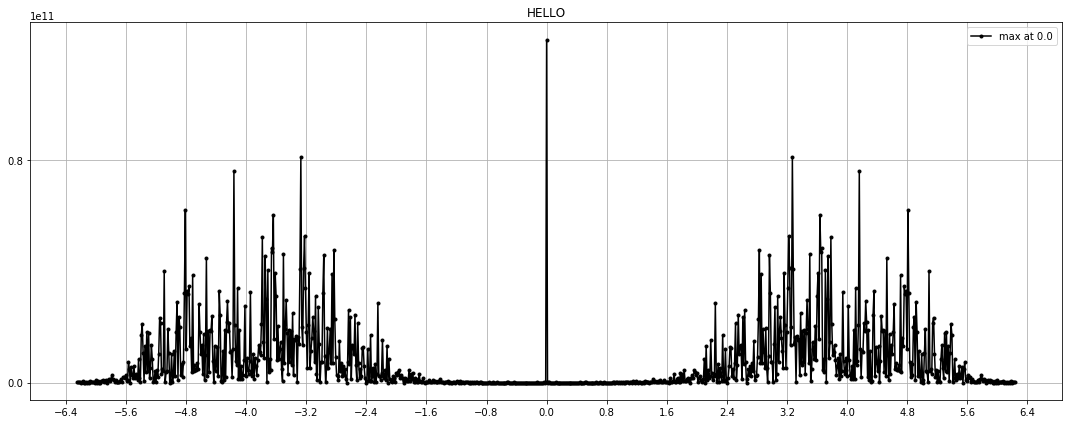

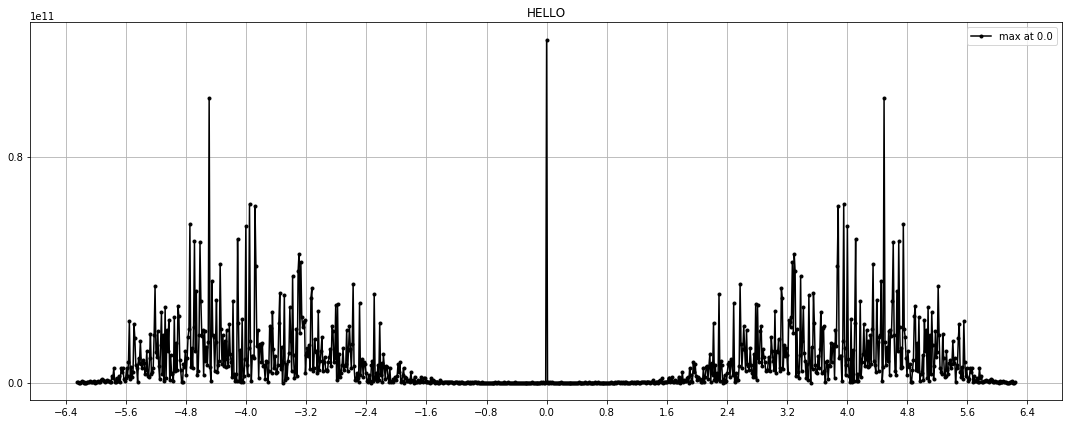

In [67]:
for i in range(5):
    plotPowerSpectrum(arr32_16000[i], vSamp, 2**11)

In [68]:
def plotMeanPowerSpectrum(signal, vSamp, numAvg, dataStreamEnd = 2**12):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    N = dataStreamEnd - dataStreamEnd/2
    dataStreamBeg = dataStreamEnd/2
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(1,1,figsize = (15,6))
    power = np.zeros(N)
    
    for i in range(numAvg):
        freq, vDFT = dft.dft(signal[i][dataStreamBeg:dataStreamEnd],time, nu, vsamp = vSamp )

        power += np.abs(vDFT)**2
    meanPower = power/len(signal)
    
    ax.plot(freq, meanPower, 'k.-')
    ax.set_title('Mean Power Spectrum Over {} blocks'.format(numAvg))

    ax.yaxis.set_major_locator(plt.MaxNLocator(2))
    ax.xaxis.set_major_locator(plt.MaxNLocator(18))
    ax.grid()  

    plt.tight_layout()

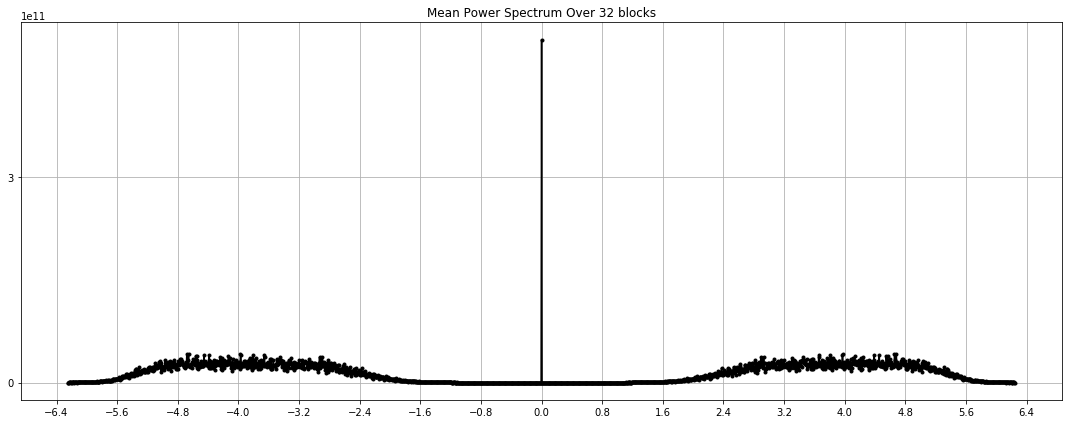

In [69]:
plotMeanPowerSpectrum(arr32_16000,vSamp,len(arr32_16000) )

### 4
    plot power spectrum for single block and compare to above average. DO the same for average of N blocks where N = (2,4,8,16)

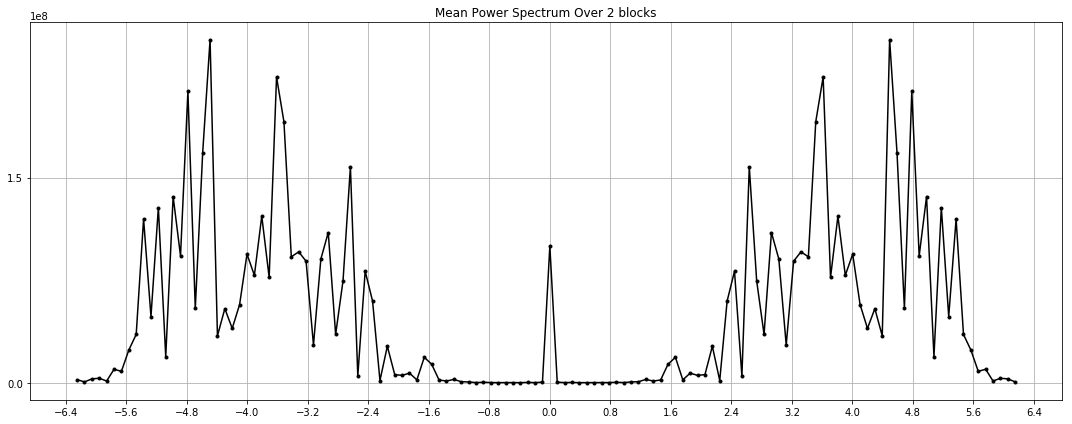

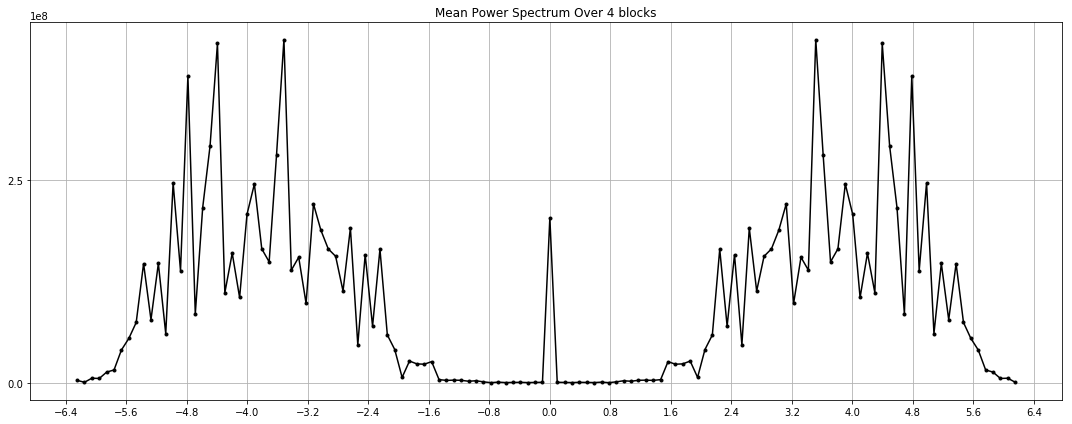

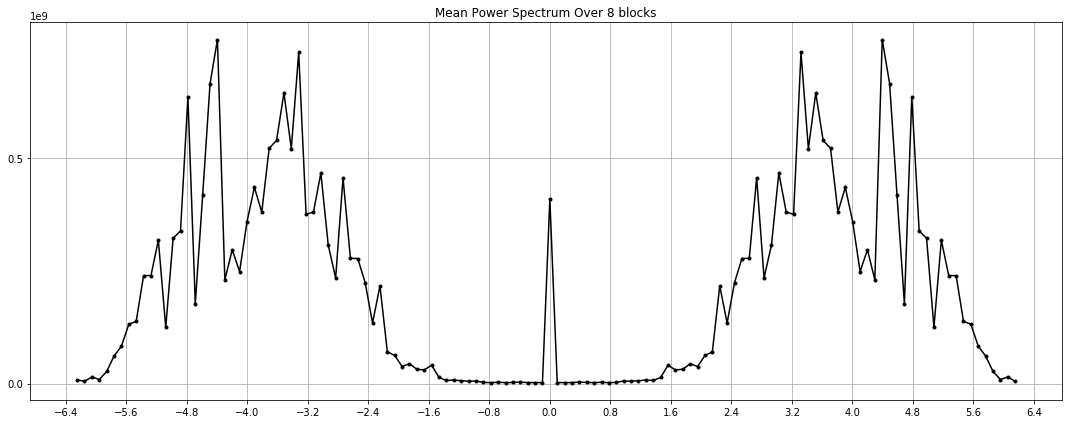

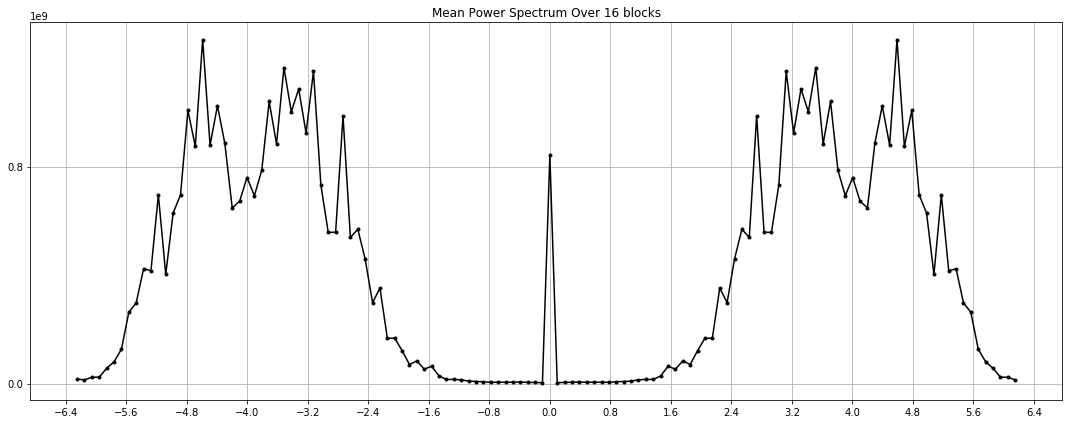

In [70]:
numAvgs = np.array([2,4,8,16])
for n in numAvgs:
    plotMeanPowerSpectrum(arr32_16000,vSamp,n, dataStreamEnd=2**8)

### How does SNR depend on N? Hint: SNR is proportional to N$^x$ but what is x?
##

### 5 $\nless$
    Calculate the ACF for a single block, usint the entire set of 16000 samples for delays of less than or equal to 2000 samples. Derive the power spectrum from this ACF and compare with the direct FT derived power spectrum for the same block.  Are they identical? Compare the width (FWHM) of the ACF with the FWHM of the power spectrum. How do they compare?

In [71]:
arr32_16000[5]/2.**12

array([-0.375 ,  0.1875,  0.5   , ...,  0.6875, -0.9375,  0.    ])

In [76]:
N = 16000

time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
acf = np.correlate(arr32_16000[1], arr32_16000[1], 'same')
freq, acf_dft = dft.dft(acf, time, nu, vsamp = vSamp )

In [77]:
freq, arr_dft = dft.dft(arr32_16000[1], time, nu, vsamp=vSamp)
power = np.abs(arr_dft)**2

In [78]:
print(np.abs(acf_dft))
print(power)

[  1.36806400e+09   3.99739275e+09   1.83577373e+09 ...,   2.88949009e+09
   1.83577373e+09   3.99739275e+09]
[  4.19489382e+09   8.05073187e+08   1.50630820e+09 ...,   5.43972512e+07
   1.50630820e+09   8.05073187e+08]


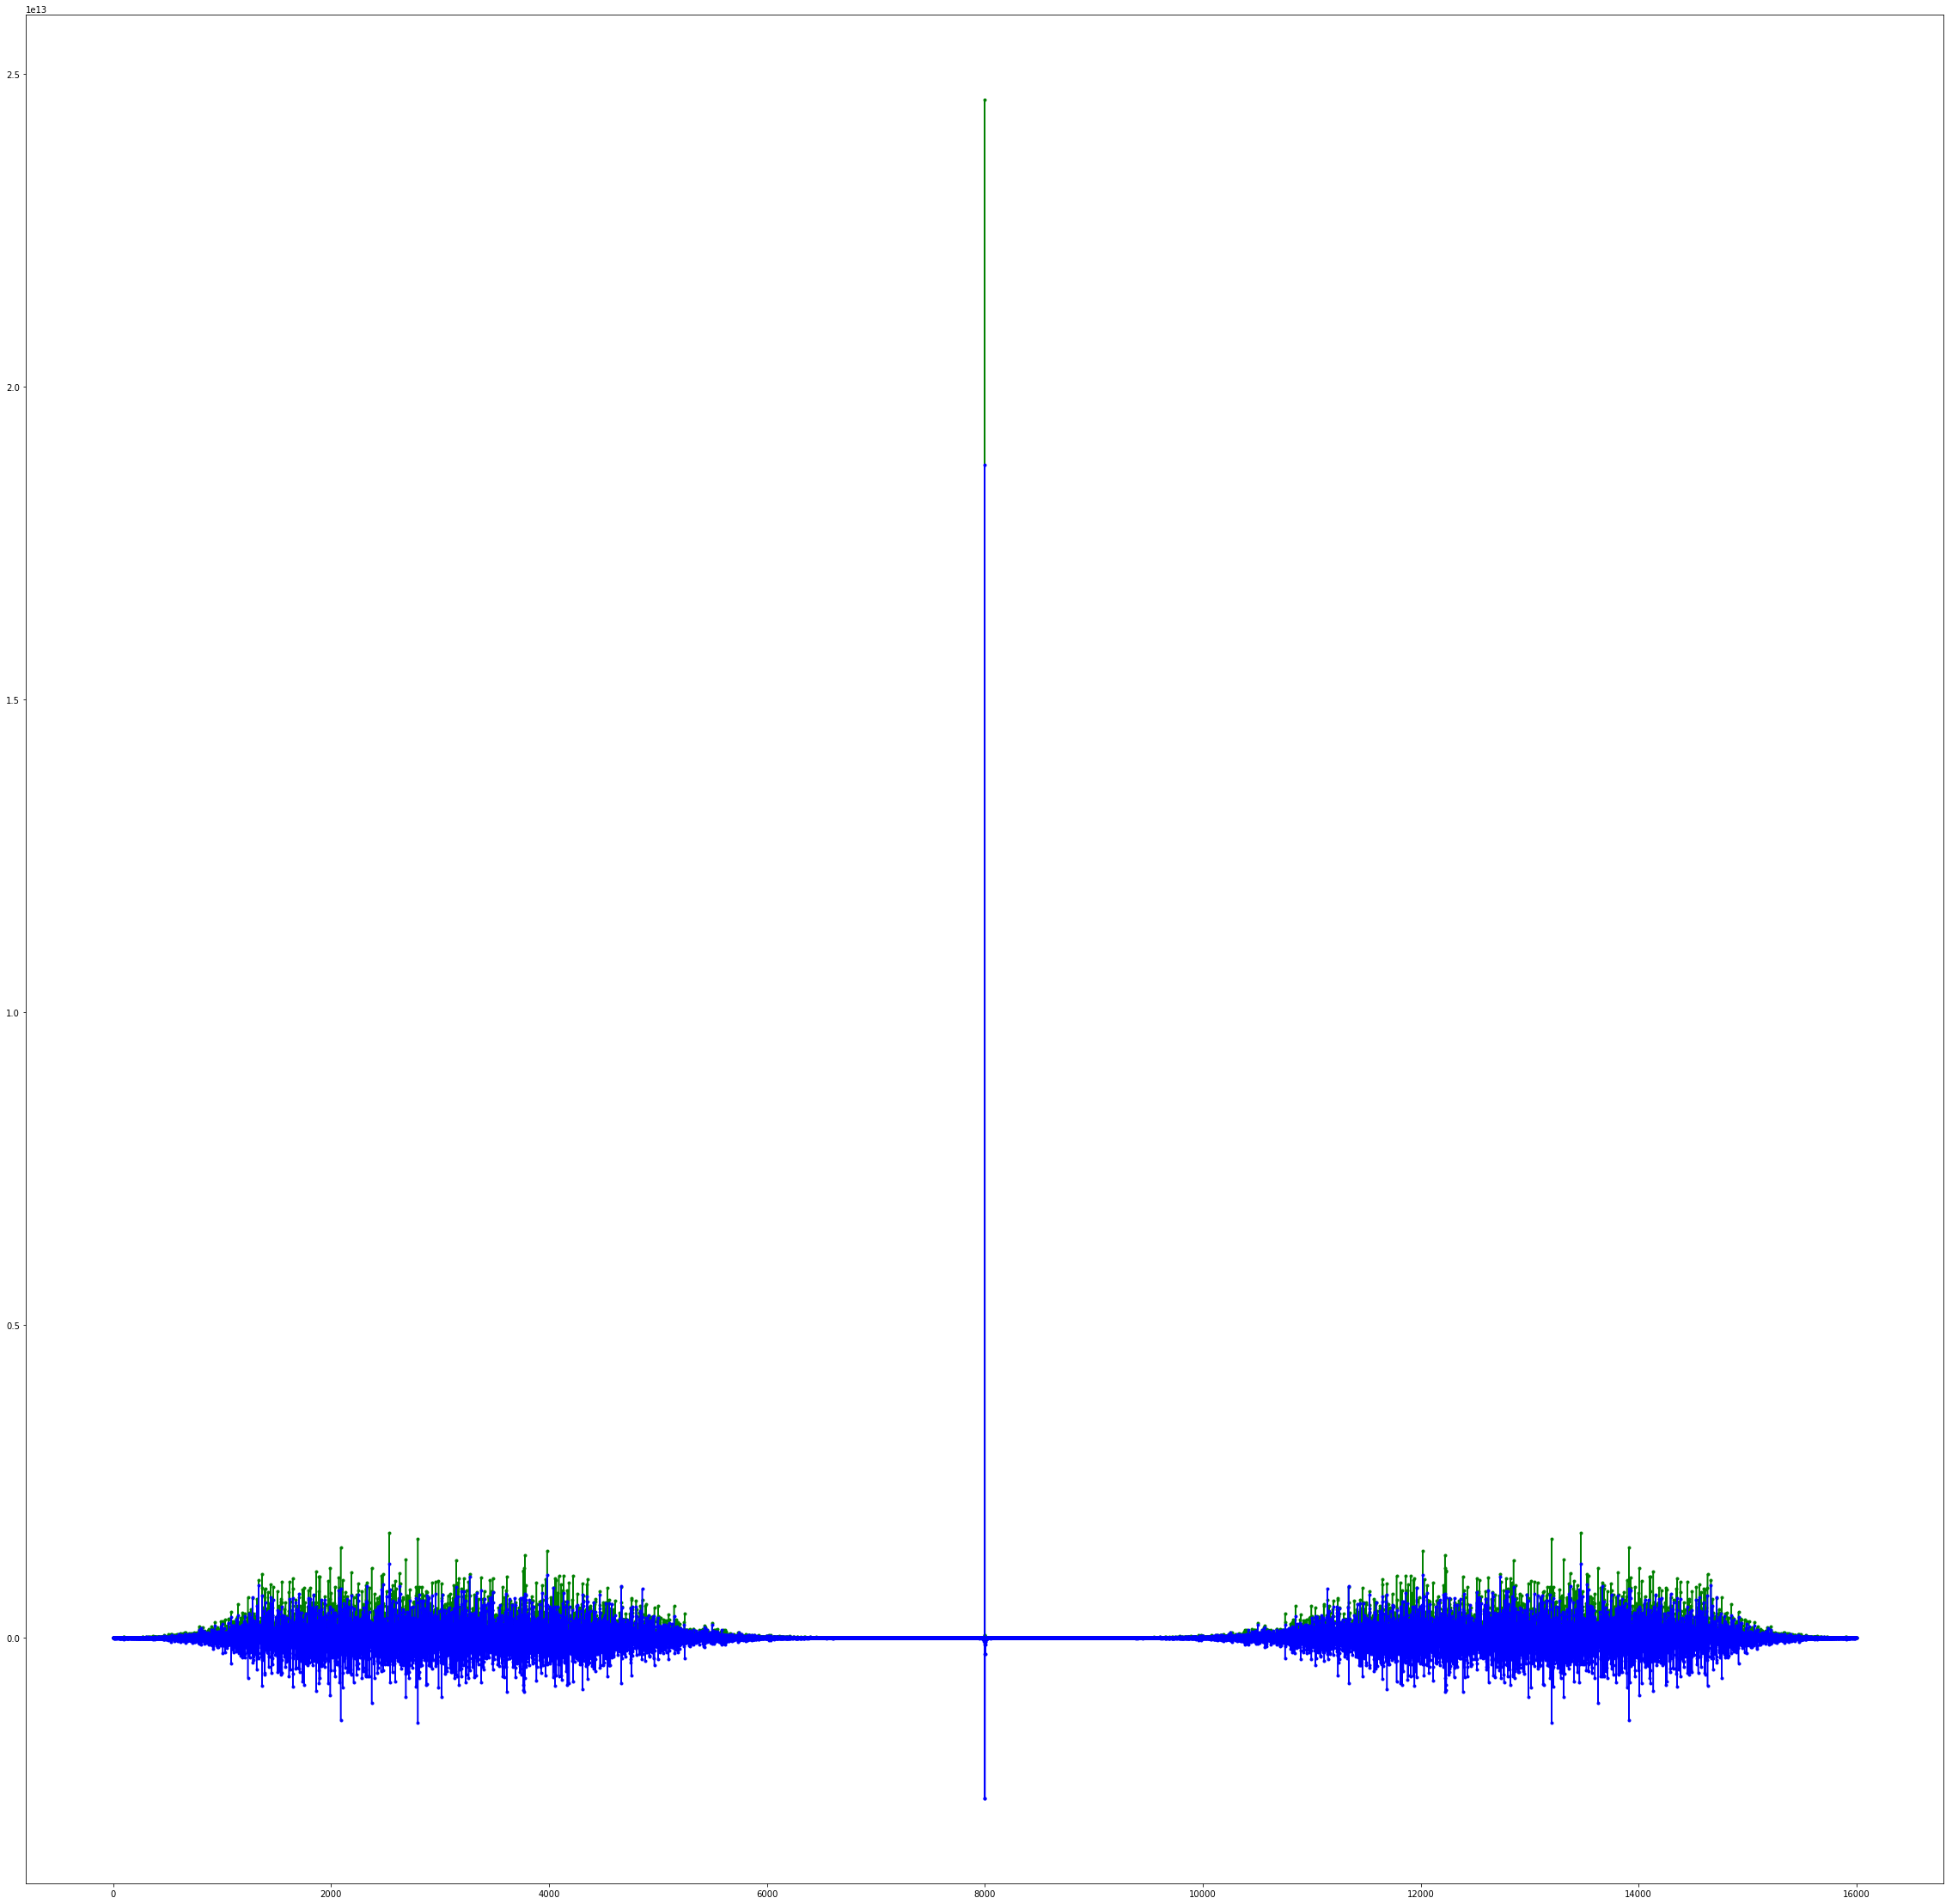

In [79]:
plt.figure(figsize = (40,40))
plt.plot(power, 'g.-', label = 'power')
plt.plot(acf_dft.real, 'b.-',label = 'acf')

# mixers!!

### 5.1 
For the two cases $\nu_{sig} = \nu_{lo} \pm \delta\nu $, plot the power spectra versus frequency. Explain why the plots look the way they do. In your explanation include the terms "upper sideband" and "lower sideband"
        

In [2]:
data5_11 = np.genfromtxt('data5.1_1.txt')/(2.**15)
data5_12 = np.genfromtxt('data5.1_2.txt')/(2.**15)

We are sampling with 512 points


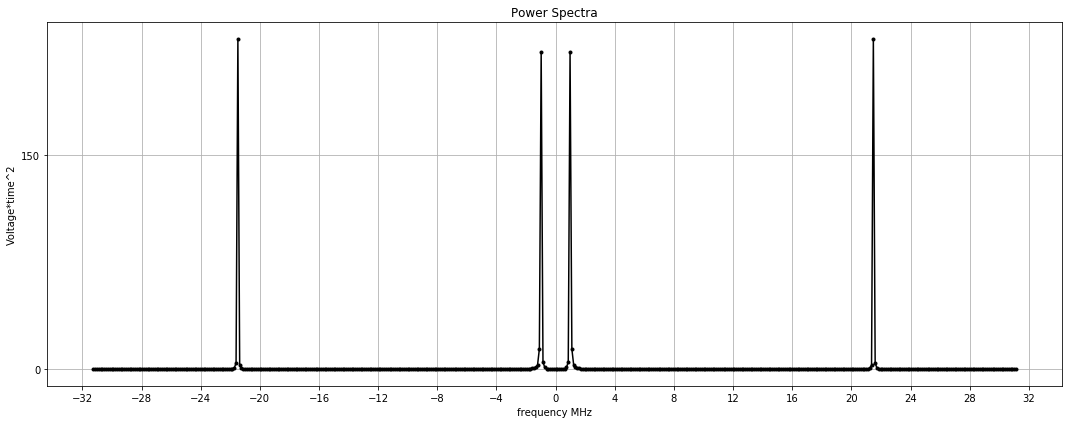

In [148]:
plotPowerSpectrum(signal=data5_11, vSamp=62.5, dataStreamEnd=2**10)

We are sampling with 512 points


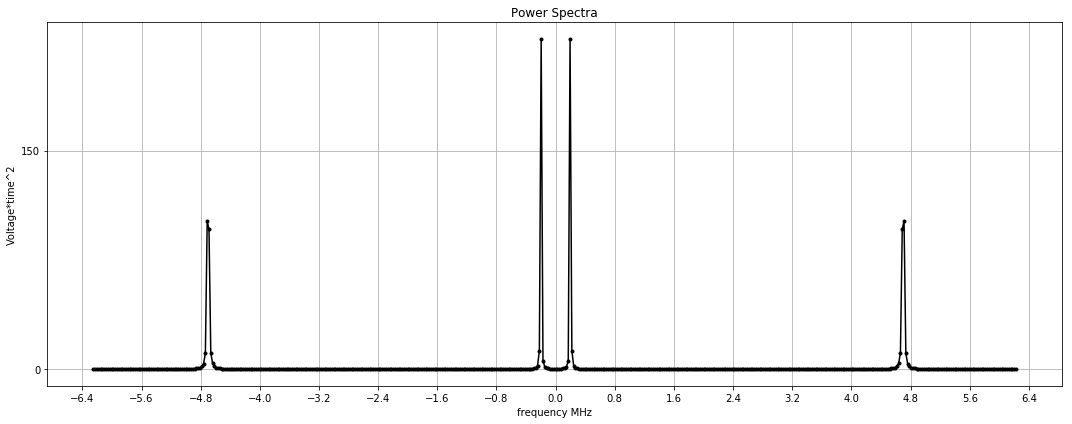

In [149]:
plotPowerSpectrum(data5_12, vSamp = 12.5, dataStreamEnd=2**10)

For one of the cases, plot the waveform. Does it look like the oscilloscope trace? 

Take the Fourier Transform of waveform to remove the sum frequency component by zeroing both the real and imaginary portions (this is 'Fourier filtering'). Recreate the signal from the filtered transform by taking the inverse transformm and plot the filtered signal versus time. Explain what you see. 

In [121]:
def plotSignals(signal, vSamp, N = 2**5):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output 
    ----
    plot of the signals
    """
    dataStreamBeg = 100
    dataStreamEnd = N + dataStreamBeg
    
    time = np.linspace(-N/2/12.5, (N/2 - 1)/12.5, N)
    
    fig, ax = plt.subplots(1,1, figsize = (20,10))

    ax.plot(time, signal[dataStreamBeg:dataStreamEnd], 'k.-')
    ax.set_title('Signal of V_sig')
    ax.set_ylabel('Voltage V')
    ax.set_xlabel('Time $\mu$s')

    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.xaxis.set_major_locator(plt.MaxNLocator(36))
    ax.grid()  
    
    print('The number of samples are {}'.format(N))
    
    plt.tight_layout()

The number of samples are 256


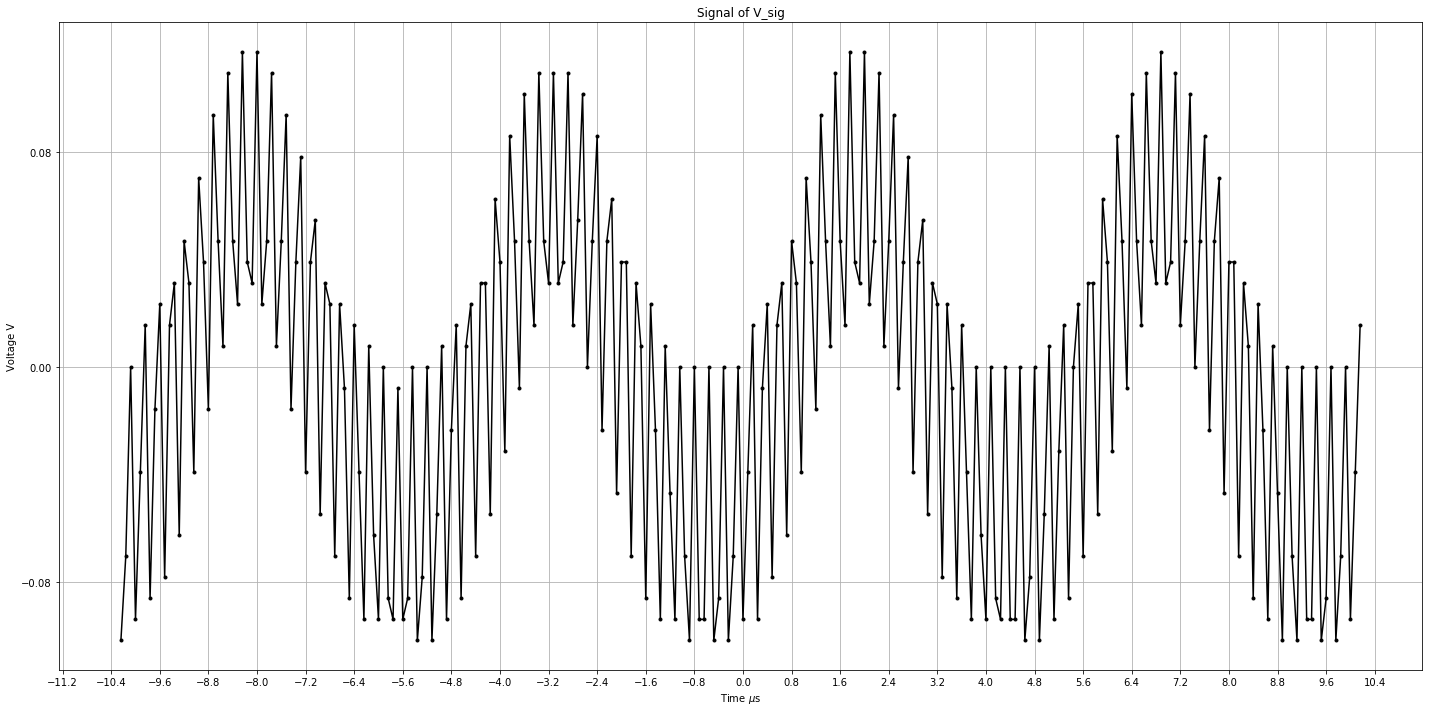

In [124]:
plotSignals(data5_11,62.5, N=2**8)

The number of samples are 256


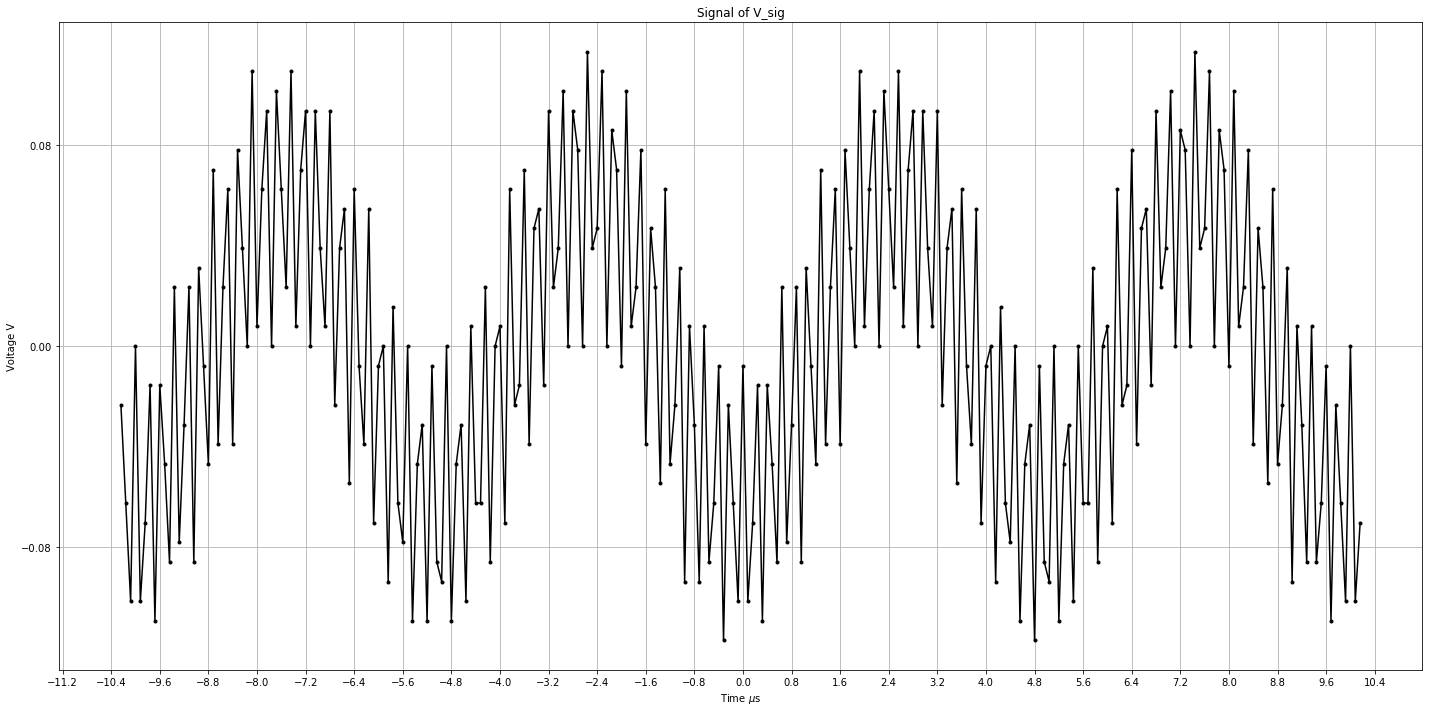

In [125]:
plotSignals(data5_12,62.5, N=2**8)

### Yes it looks like the oscilloscope trace

In [136]:
def plotDFT(signal, vSamp, N = 2**9):
    """
    N  == number of samples 
    signal == array of 9 arrays that correspond to (0.1, 0.2, .., 0.9)vSamp
    vSamp == 62.5/divisor MHz (divisor comes from pico.read_socket)
    
    output =============
    plot of the power spectrum P(v) = E(v)*E(v)* which we get by using discrete fourier transform
    """
    dataStreamBeg = 100
    dataStreamEnd = N + dataStreamBeg
    
    time = np.linspace(-N/2./vSamp, (N/2.-1)/vSamp, N)
    nu = np.linspace(-vSamp/2., (vSamp/2.)*(1- 2./N), N)
    
    fig, ax = plt.subplots(2,1, figsize = (15,8))
    ax = ax.ravel()
    
    signal = signal[dataStreamBeg:dataStreamEnd]
    
    freq, vDFT = dft.dft(signal,time, nu, vsamp = vSamp )

    ax[0].plot(freq, np.real(vDFT), 'k.-', label = 'real')
    ax[0].plot(freq, np.imag(vDFT), 'b.-', label = 'imaginary')
    ax[1].plot(time, signal, 'g.-', label = 'signal')
    ax[0].set_title('DFT of signal')
    
    cutVDFT = vDFT[(freq < 60.5 )] = 0
    cut_signal = dft.idft(Fx=vDFT, f=freq, t=time, vsamp=vSamp)

    ax[0].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[0].xaxis.set_major_locator(plt.MaxNLocator(18))
    ax[0].grid()  
    ax[0].legend()
    
    ax[1].set_title('Filtered Signal')
    ax[1].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(18))
    ax[1].grid()  
    ax[1].legend()
    print('The number of samples are {}'.format(N))

    plt.tight_layout()


The number of samples are 1024


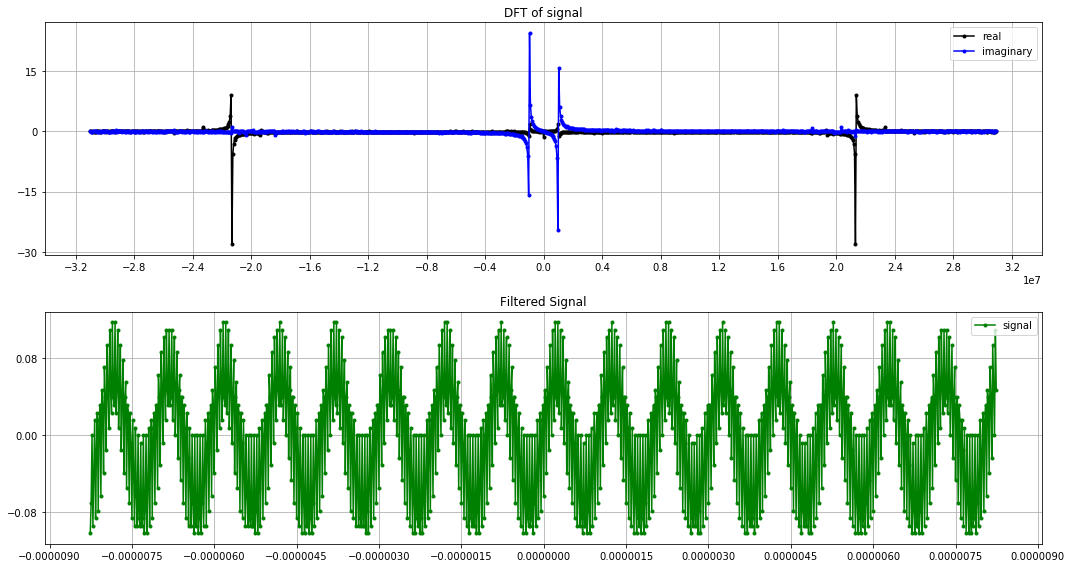

In [137]:
plotDFT(data5_11, vSamp = 62e6, N = 2**10)

### 5.2

We are sampling with 1024 points


(0, 4)

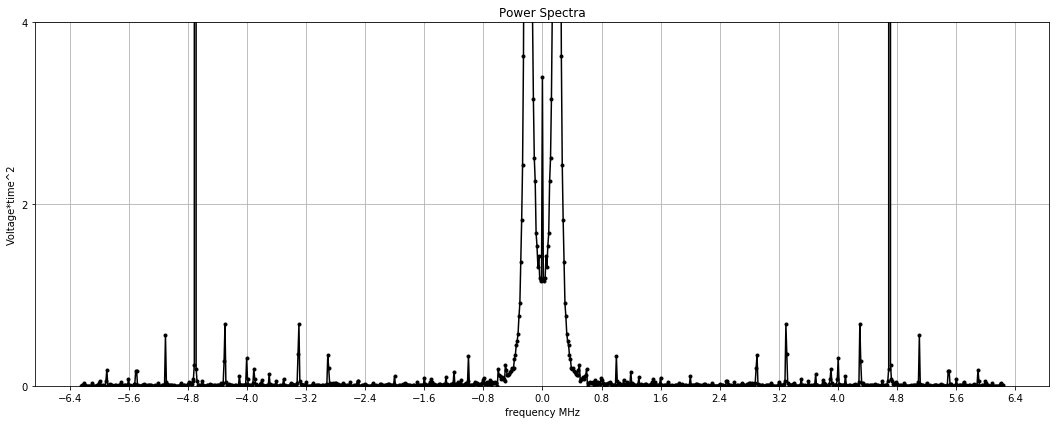

In [152]:
plotPowerSpectrum(data5_12, vSamp = 12.5, dataStreamEnd=2**11)
plt.ylim(0,4)

### 5.3

In [143]:
arr = np.genfromtxt('5_3_1')/(2**13)
arr2 = np.genfromtxt

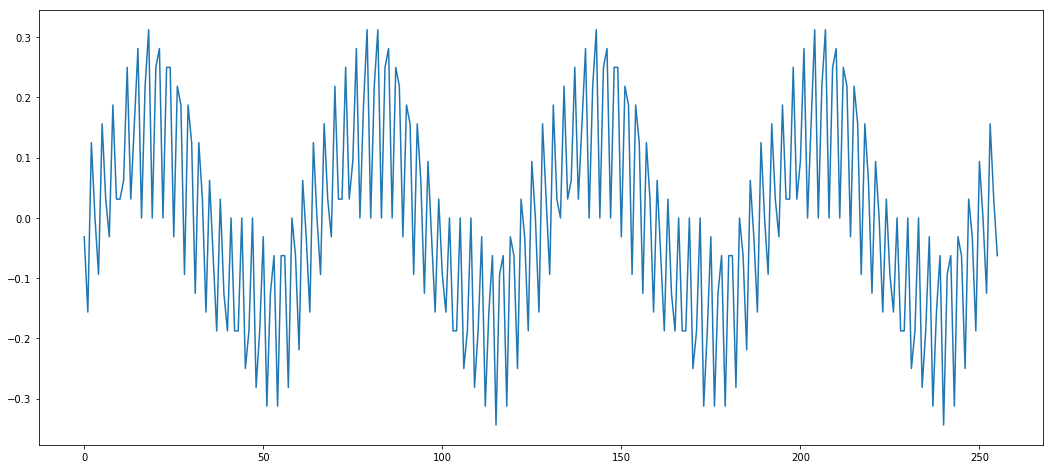

In [144]:
plt.figure(figsize = (18,8))
plt.plot(arr[:2**8])

In [83]:
arr2 = np.genfromtxt('5_3_2.txt')/


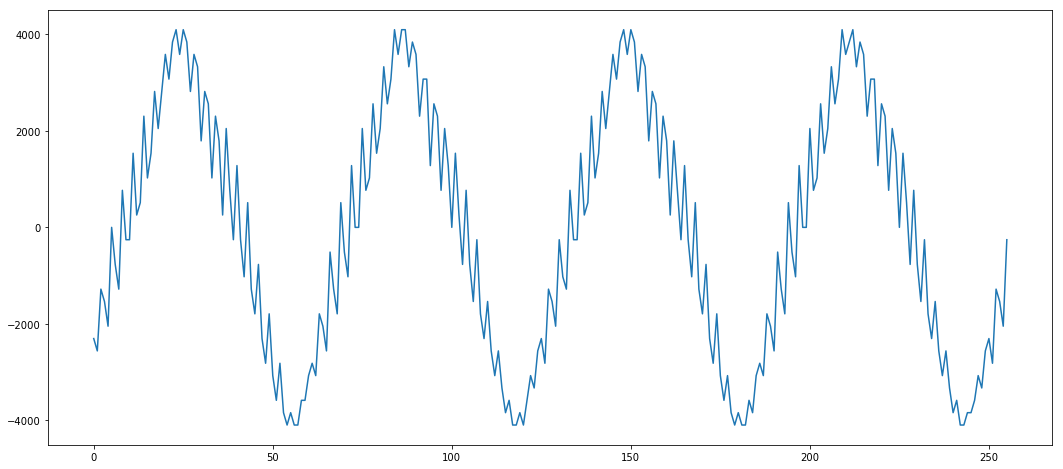

In [132]:
plt.figure(figsize = (18,8))
plt.plot(arr2[:2**8])